In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

# Description

In [3]:
## Look at data distribution, how many Na's?
## Summary description 
class dataframe_investigation:
    def __init__(self,dataframe,column):
        self.null_check = dataframe[dataframe.isnull().any(axis=1)]
        self.null_count = dataframe.isnull().sum()
        self.null_to_mean = dataframe[column].fillna(dataframe[column].mean())
        self.null_to_median = dataframe[column].fillna(dataframe[column].median())
        self.null_to_zero = dataframe[column].fillna(0)

In [4]:
di=dataframe_investigation(df_train,'conversion_value')

In [5]:
#Check amount of Na's in the dataset 
print(di.null_count)
## large amounts of Null values available in this data set. Do not use only complete case


idx                              0
time_to_first_matter           556
time_to_first_time_entry       635
time_to_first_bill             819
time_to_second_user            884
page_views_in_first_hour        28
page_views_in_first_day         28
page_views_in_first_7_days      28
page_views_in_first_14_days     28
time_to_conversion             829
conversion_value               829
dtype: int64


In [6]:
### SOme accounts convert before engaging with the application. SO lets remove those accounts. 
## If the difference is positive then remove it. This means time to first matter is more than than time_to conversion 
df_train['diff']=df_train['time_to_first_matter']-df_train['time_to_conversion']

## remove cases where accounts pay before engaging with aplication 
remove_df=df_train.loc[lambda x: (x['diff']>0).tolist()]
df_train=df_train[~df_train.idx.isin(remove_df.idx)]
df_train.drop(columns=['diff'],inplace=True)

In [7]:
#3 Summary of data 
df_train.describe(percentiles=[.25,0.5,.75,0.95])

,idx,time_to_first_matter,time_to_first_time_entry,time_to_first_bill,time_to_second_user,page_views_in_first_hour,page_views_in_first_day,page_views_in_first_7_days,page_views_in_first_14_days,time_to_conversion,conversion_value
count,942.000000,3.860000e+02,3.160000e+02,1.650000e+02,8.400000e+01,914.000000,914.000000,914.000000,914.000000,1.130000e+02,113.000000
mean,644.414013,8.270049e+04,8.691304e+04,1.639240e+05,2.261222e+05,19.936543,36.717724,66.492341,85.698031,5.234009e+05,101.687965
std,370.420011,2.002002e+05,1.951176e+05,2.675740e+05,3.303036e+05,23.257648,67.840603,147.253008,196.621187,3.347439e+05,108.349874
min,2.000000,4.800000e+01,1.500000e+01,2.170000e+02,1.010000e+02,1.000000,1.000000,1.000000,1.000000,5.280000e+02,29.590000
25%,321.250000,3.445000e+02,4.740000e+02,1.150000e+03,8.152500e+02,5.000000,7.000000,8.000000,8.000000,2.543330e+05,49.000000
50%,654.000000,1.113500e+03,1.875500e+03,6.255000e+03,2.145750e+04,12.000000,15.000000,19.000000,20.000000,5.447400e+05,62.100000
75%,967.500000,3.040700e+04,6.670225e+04,2.338000e+05,3.492052e+05,25.000000,36.000000,55.750000,66.000000,6.839470e+05,117.300000
95%,1215.750000,5.213842e+05,5.385268e+05,7.570074e+05,1.027531e+06,72.350000,138.350000,294.050000,384.300000,1.105198e+06,273.600000
max,1283.000000,1.130506e+06,1.207301e+06,1.204219e+06,1.198713e+06,149.000000,673.000000,1813.000000,2117.000000,1.204386e+06,828.000000


In [8]:
## we want to categorize the sparse columns. This can be useful for visualization if time permits 
## Instead of NA's we have zeros's 
column_names=['time_to_first_matter','time_to_first_time_entry','time_to_first_bill',
             'time_to_second_user',  'page_views_in_first_hour' , 'page_views_in_first_day',
             'page_views_in_first_7_days'  ,'page_views_in_first_14_days' ,'time_to_conversion']
categorized_columns=['first_matter','first_time_entry','first_bill','second_user','first_hour_views','first_day_views',
                    '7_day_views','14_day_views','conversion']

for i in range(len(column_names)):
    df_train[categorized_columns[i]]=[0 if pd.isna(x) else 1 for x in df_train[column_names[i]]]

In [9]:
## idx columnshow there is a class imbalance for those who are converted versus those who arent 
df_train.groupby(by=['conversion']).count()

,idx,time_to_first_matter,time_to_first_time_entry,time_to_first_bill,time_to_second_user,page_views_in_first_hour,page_views_in_first_day,page_views_in_first_7_days,page_views_in_first_14_days,time_to_conversion,conversion_value,first_matter,first_time_entry,first_bill,second_user,first_hour_views,first_day_views,7_day_views,14_day_views
conversion,,,,,,,,,,,,,,,,,,,
0,829,293,223,107,43,801,801,801,801,0,0,829,829,829,829,829,829,829,829
1,113,93,93,58,41,113,113,113,113,113,113,113,113,113,113,113,113,113,113


# Exploration

In [10]:
#Get conversion rates for 
def get_conversion_rates(column,condition,value):
    '''
    Gets conversion rates based on the the filtered condition
    
    Returns an integer. 
    '''
    df=df_train.loc[df_train[condition]==value]## we want to look at the cases where they completed a task. Non completion would be inconclusive 
    val=df['time_to_conversion'].count()/df[column].count()
    return val 
for i in range(len(column_names)):
    print("The conversion rate for %s is %f" %(column_names[i],get_conversion_rates(column_names[i],categorized_columns[i],1)))


The conversion rate for time_to_first_matter is 0.240933
The conversion rate for time_to_first_time_entry is 0.294304
The conversion rate for time_to_first_bill is 0.351515
The conversion rate for time_to_second_user is 0.488095
The conversion rate for page_views_in_first_hour is 0.123632
The conversion rate for page_views_in_first_day is 0.123632
The conversion rate for page_views_in_first_7_days is 0.123632
The conversion rate for page_views_in_first_14_days is 0.123632
The conversion rate for time_to_conversion is 1.000000


In [11]:
#Total conversion rate
print(df_train['time_to_conversion'].count()/df_train['idx'].count())

0.11995753715498939


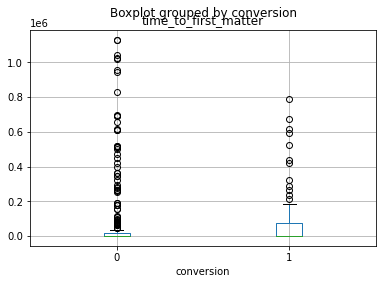

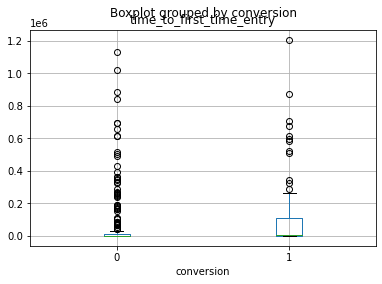

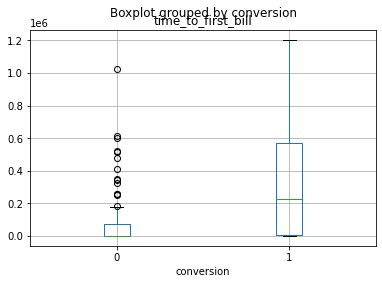

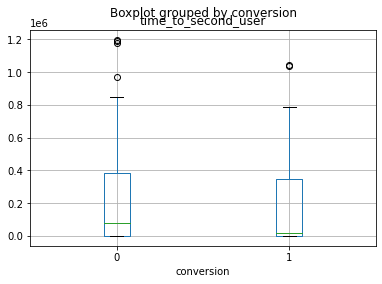

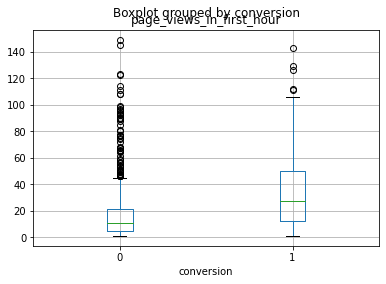

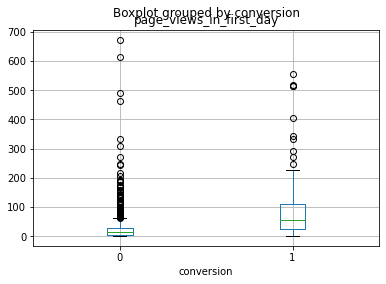

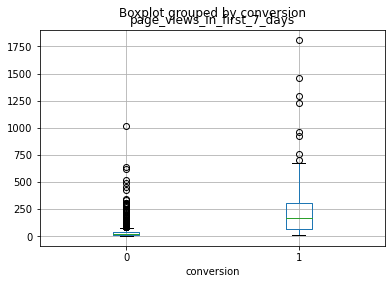

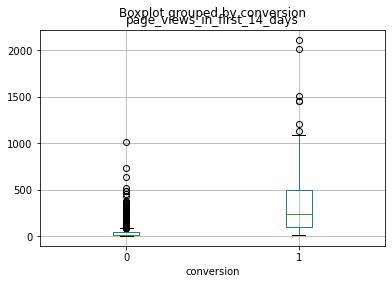

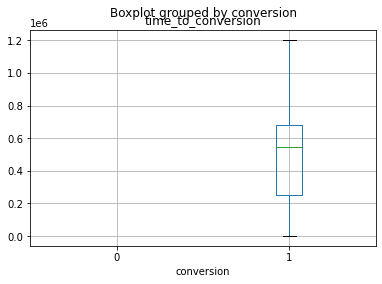

In [12]:
for i in column_names:
    df_train.boxplot(column=[i],by='conversion')
# sns.pairplot(df_train[column_names])

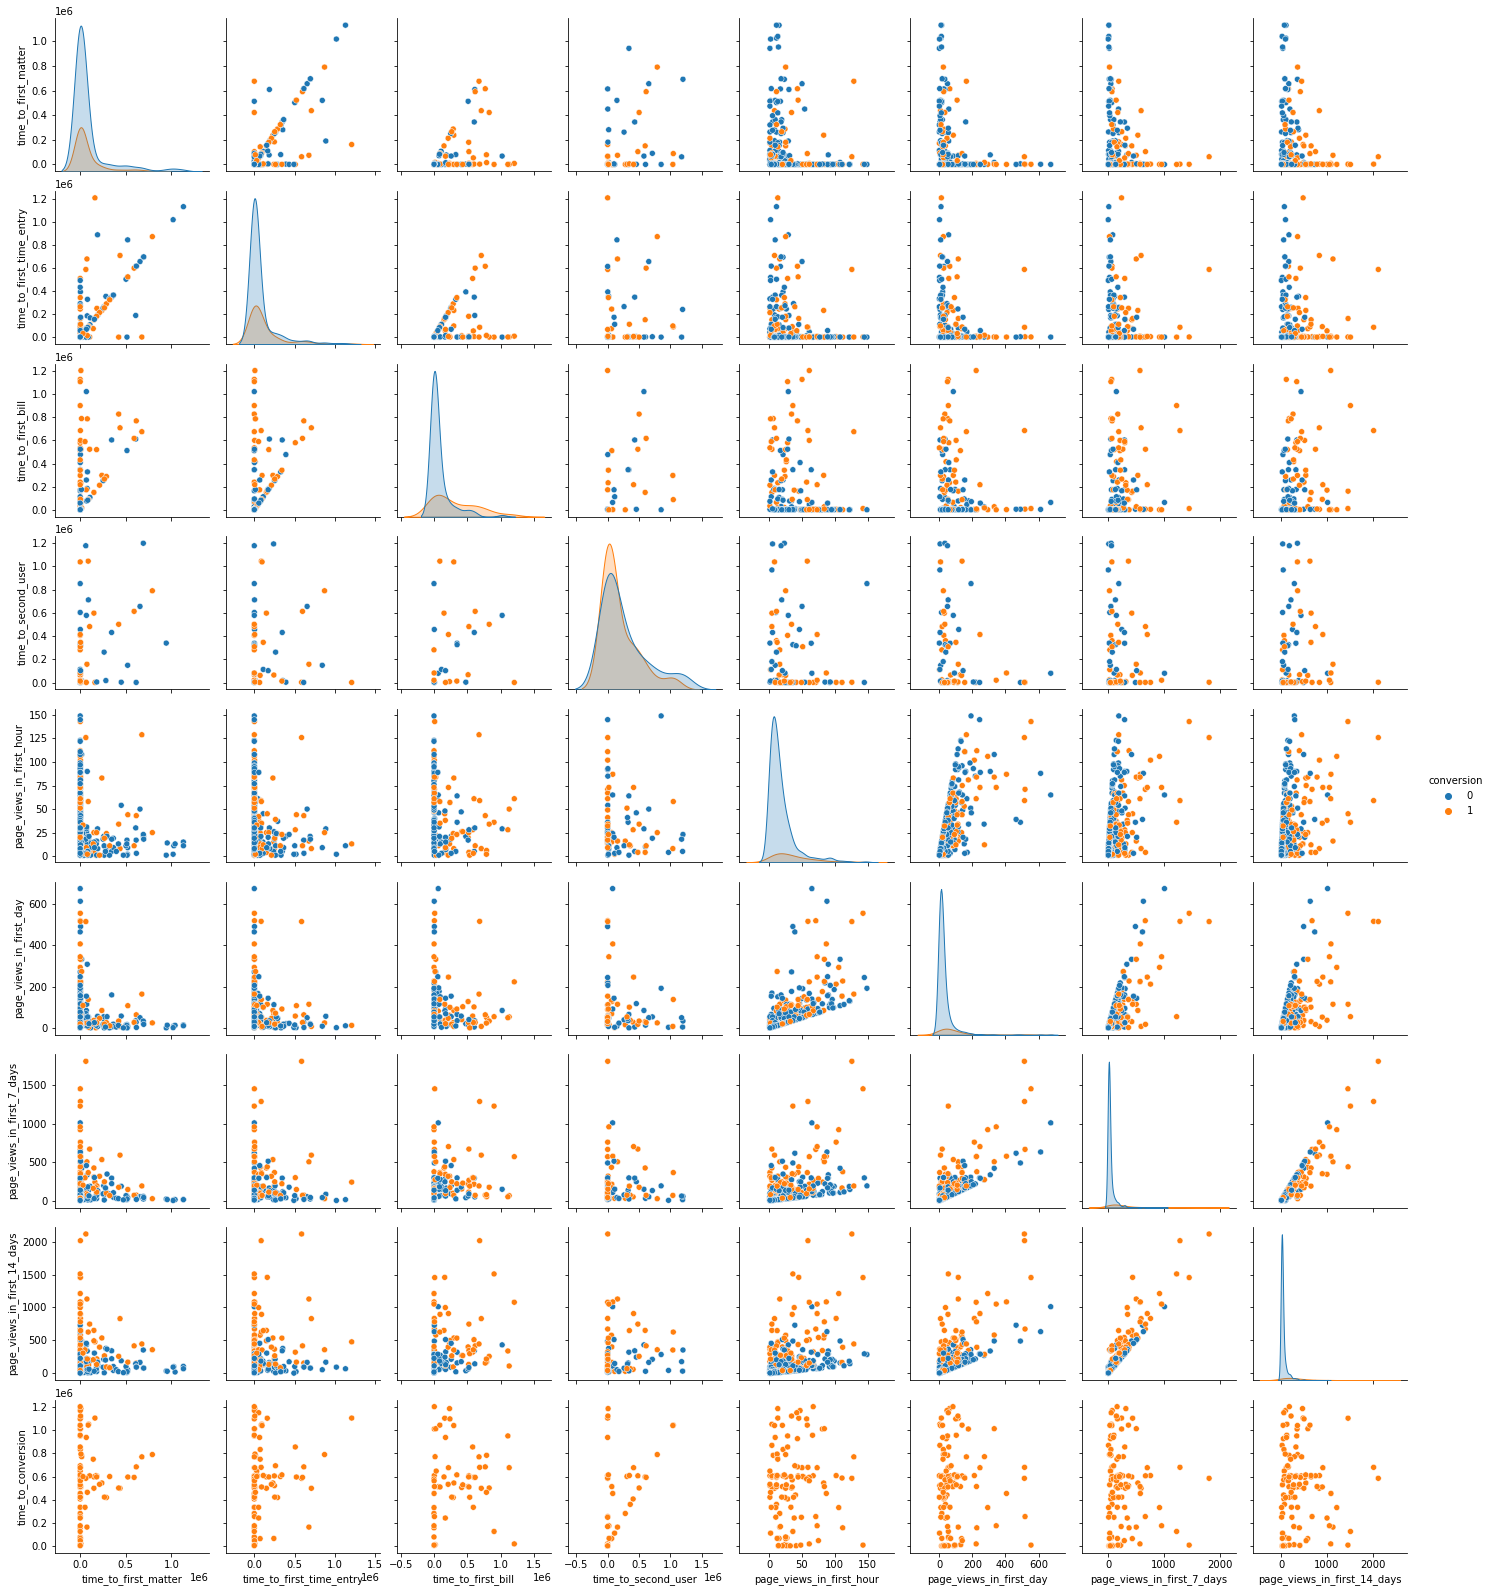

In [13]:
sns.pairplot(df_train,
            x_vars=['time_to_first_matter','time_to_first_time_entry','time_to_first_bill',
             'time_to_second_user',  'page_views_in_first_hour' , 'page_views_in_first_day',
             'page_views_in_first_7_days'  ,'page_views_in_first_14_days'],
            y_vars=column_names,
            hue='conversion')

Is it possible that the relationships change once we standardize the data? Lets redo this using standardzed data. 
Removing outliers in such a small dataset would cause problems. There are also a lot of NA's in the dataset. 


In [14]:
df_train_scaled=df_train.copy()
from sklearn.preprocessing import StandardScaler

# Get a scaler object
scaler = StandardScaler()
df_train_scaled[column_names] = scaler.fit_transform(df_train_scaled[column_names])


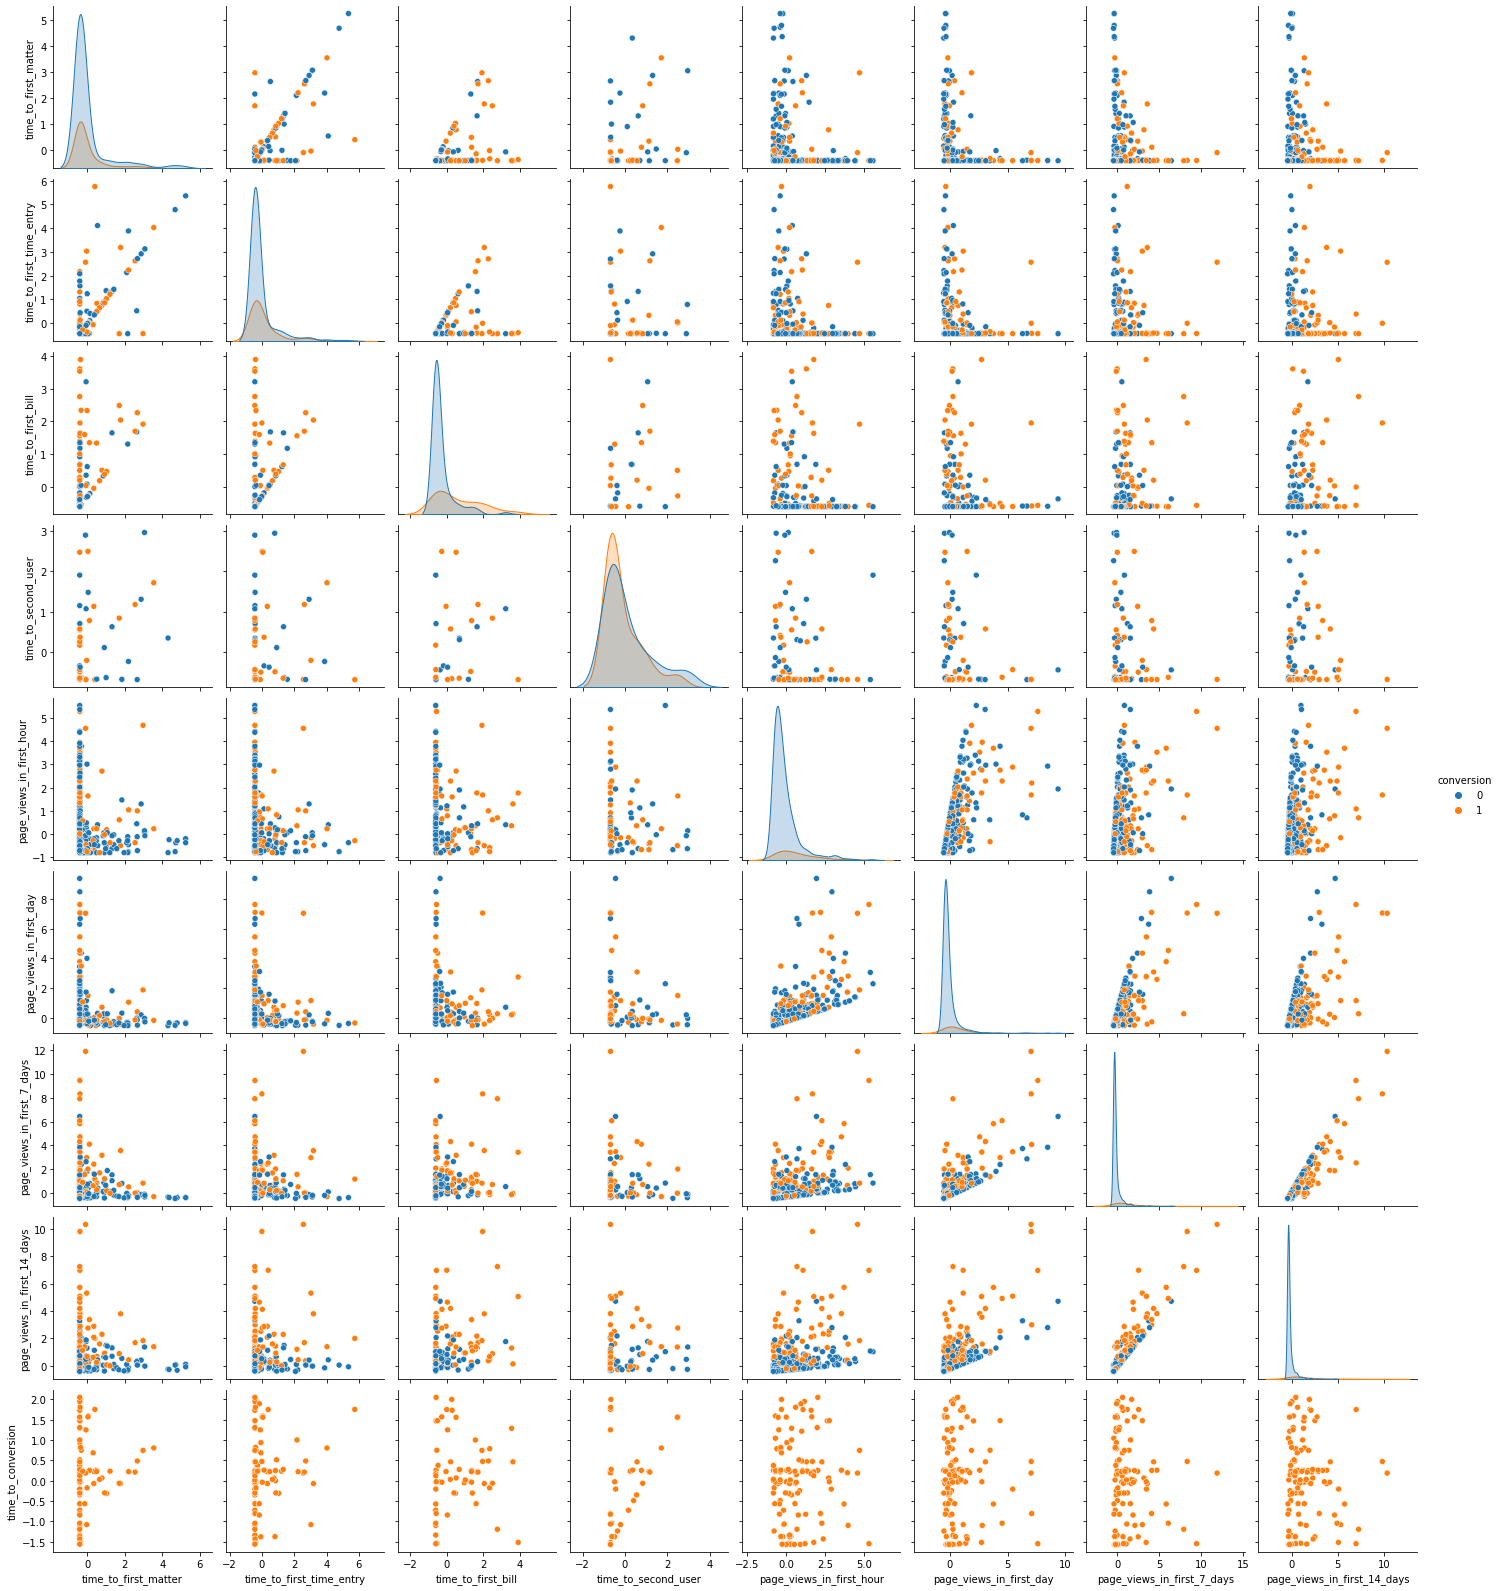

In [15]:
sns.pairplot(df_train_scaled,
            x_vars=['time_to_first_matter','time_to_first_time_entry','time_to_first_bill',
             'time_to_second_user',  'page_views_in_first_hour' , 'page_views_in_first_day',
             'page_views_in_first_7_days'  ,'page_views_in_first_14_days'],
            y_vars=column_names,
            hue='conversion')

# Random Forest Model 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from numpy import mean
from matplotlib import pyplot as plt
from scipy import stats




In [17]:
features = ['first_matter','first_time_entry','first_bill','second_user','page_views_in_first_14_days']
label = 'conversion'
X, y = df_train[features], df_train[label]
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
X['page_views_in_first_14_days'].fillna(0,inplace=True)

<ipython-input-17-7d027188a477>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['page_views_in_first_14_days'].fillna(0,inplace=True)


In [18]:
# numeric_features = ['page_views_in_first_14_days']
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])


# # Combine preprocessing steps
# preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)],remainder='passthrough')
        
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('logregressor', RandomForestClassifier(n_estimators=100))])


# # fit the pipeline to train a logistic regression model on the training set
# skf = StratifiedKFold(n_splits=5)  
# scores = cross_val_score(pipeline, X, y, cv=skf, scoring="recall")
# #model = pipeline.fit(X, y)
# #print (model)

In [19]:
over_values = [0.2,0.3,0.4,0.5]
under_values = [0.9,0.8,0.7,0.6,0.5]
for o in over_values:
    for u in under_values:
        numeric_features = ['page_views_in_first_14_days']
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())])


# Combine preprocessing steps
        preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)],remainder='passthrough')
        over = SMOTE(sampling_strategy=o)
        under = RandomUnderSampler(sampling_strategy=u)
        steps=[('o', over), ('u', under),('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))]
        pipeline = Pipeline(steps=steps)


# fit the pipeline to train a logistic regression model on the training set
        skf = StratifiedKFold(n_splits=5)  
        scores = cross_val_score(pipeline, X, y, cv=skf, scoring="recall")
        score=mean(scores)
        print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))


SMOTE oversampling rate:0.2, Random undersampling rate:0.9 , Mean ROC AUC: 0.815
SMOTE oversampling rate:0.2, Random undersampling rate:0.8 , Mean ROC AUC: 0.779
SMOTE oversampling rate:0.2, Random undersampling rate:0.7 , Mean ROC AUC: 0.753
SMOTE oversampling rate:0.2, Random undersampling rate:0.6 , Mean ROC AUC: 0.709
SMOTE oversampling rate:0.2, Random undersampling rate:0.5 , Mean ROC AUC: 0.726
SMOTE oversampling rate:0.3, Random undersampling rate:0.9 , Mean ROC AUC: 0.717
SMOTE oversampling rate:0.3, Random undersampling rate:0.8 , Mean ROC AUC: 0.700
SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.717
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.673
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.673
SMOTE oversampling rate:0.4, Random undersampling rate:0.9 , Mean ROC AUC: 0.699
SMOTE oversampling rate:0.4, Random undersampling rate:0.8 , Mean ROC AUC: 0.674
SMOTE oversampling rate:0.4,

WE can also rerun the pipeline and consider recall as another performance metric. Optional 

In [20]:
## rerun the model with best Hyperparameters## 
numeric_features = ['page_views_in_first_14_days']
numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())])


# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)],remainder='passthrough')
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.9)
steps=[('o', over), ('u', under),('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))]
pipeline = Pipeline(steps=steps)


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X, y)
print (model)

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.2)),
                ('u', RandomUnderSampler(sampling_strategy=0.9)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['page_views_in_first_14_days'])])),
                ('logregressor', RandomForestClassifier())])


Text(0.5, 0, 'Random Forest Feature Importance')

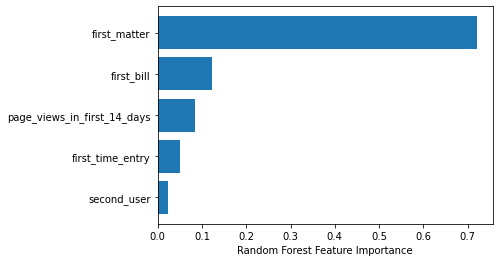

In [21]:
coefs=model.named_steps["logregressor"].feature_importances_
coefs
sorted_idx = model.named_steps["logregressor"].feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model.named_steps["logregressor"].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Additional Exploration

In [22]:
### investigate first_matter more, remove outliers see what we can find here. Time permits, investigate other columns more as well 
# Remove outliers 
def filtering_function(lower,upper):
    """
    Filters dataframe based on sepcified float quantiles, must be less than 1
    Removes outliers outside of 1.5IQR range 
    
    Returns the filtered dataframe
    """
    q_low = df_train["time_to_first_matter"].quantile(lower)
    q_hi  = df_train["time_to_first_matter"].quantile(upper)
    iqr=q_hi-q_low
    filter_df=df_train[(df_train["time_to_first_matter"] < q_hi+1.5*iqr) & (df_train["time_to_first_matter"] > q_low-1.5*iqr)]
    return filter_df


df_25_75=filtering_function(0.25,0.75)






In [23]:
def plotting_function(dataframe,x_var,y_var):
    sns.pairplot(dataframe,
            x_vars=x_var,
            y_vars=y_var,
            hue='conversion')

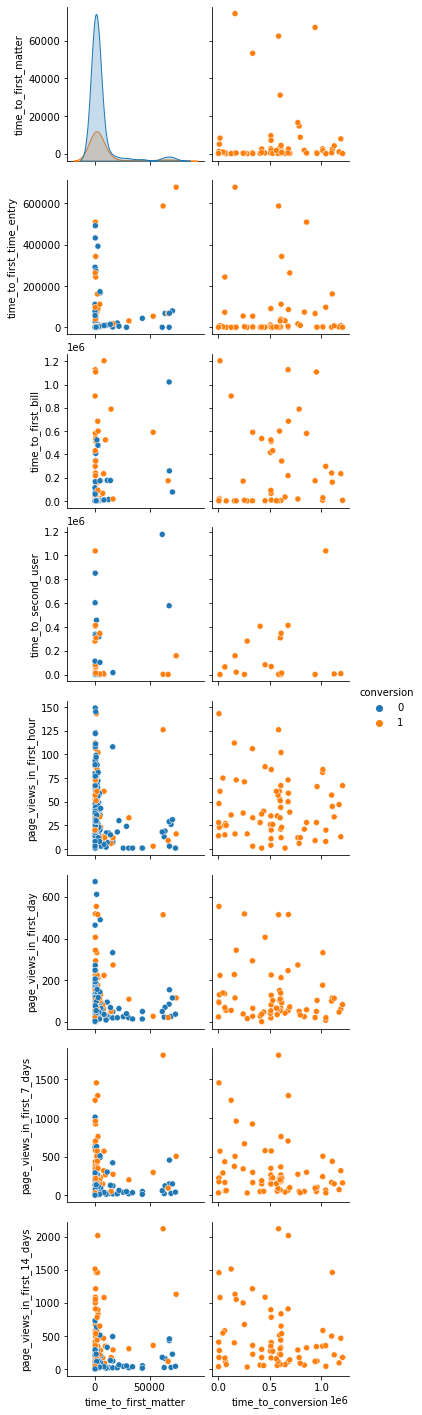

In [24]:
x_vars=['time_to_first_matter','time_to_conversion']
y_vars=['time_to_first_matter','time_to_first_time_entry','time_to_first_bill',
'time_to_second_user',  'page_views_in_first_hour' , 'page_views_in_first_day',
    'page_views_in_first_7_days'  ,'page_views_in_first_14_days']
plotting_function(df_25_75,x_vars,y_vars)

In [25]:
df_25_75.time_to_first_matter.describe(percentiles=[.25,0.60,.70,.75])
## Still many outliers 

count      306.000000
mean      5097.366013
std      13771.138598
min         48.000000
25%        289.000000
50%        647.000000
60%       1001.000000
70%       1733.000000
75%       2384.500000
max      74352.000000
Name: time_to_first_matter, dtype: float64

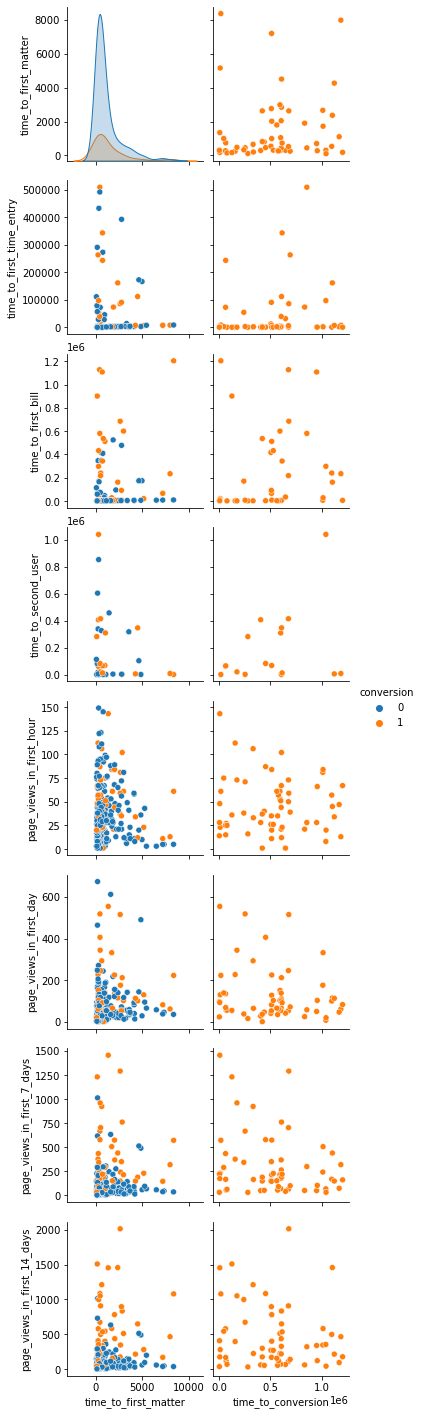

In [26]:
## Performs better 
df_25_65=filtering_function(.25,0.65)
plotting_function(df_25_65,x_vars,y_vars)


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

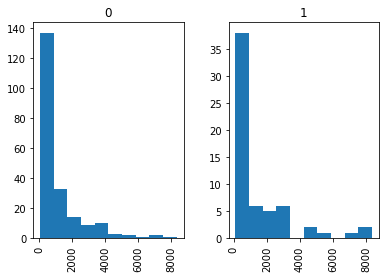

In [27]:
df_25_65.hist('time_to_first_matter',by='conversion')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

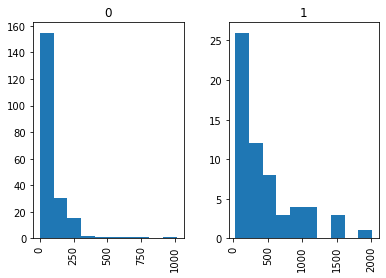

In [28]:
df_25_65.hist('page_views_in_first_14_days',by='conversion')

## Predict Using Test

In [29]:
column_names_test=['time_to_first_matter','time_to_first_time_entry','time_to_first_bill',
             'time_to_second_user' ,'page_views_in_first_14_days']
categorized_columns_test=['first_matter','first_time_entry','first_bill','second_user','14_day_views']

for i in range(len(column_names_test)):
    df_test[categorized_columns_test[i]]=[0 if pd.isna(x) else 1 for x in df_test[column_names_test[i]]]
X_test=df_test[features]


In [30]:
#remove na's on feature columns 
df_test.dropna(subset=['first_matter','first_time_entry','first_bill','second_user','page_views_in_first_14_days'],inplace=True)

### consider imputation methods in the future to imporive sparsity of model.

In [31]:
predictions = model.predict(df_test)
y_scores = model.predict_proba(df_test)
